In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('./data/cleaned_results_and_rankings.csv')
df.head()

,date,home_team,away_team,home_score,away_score,neutral,home_rank,away_rank,h_goals_for_avg,h_goals_against_avg,a_goals_for_avg,a_goals_against_avg,datetime,match_type_FIFA_WCQ,match_type_Friendly,match_type_Qualifier,match_type_Tournament/Cup_Match
0,1993-01-01,Ghana,Mali,1,1,1,39.0,69.0,0.0,0.0,0.0,0.0,1993-01-01,0,1,0,0
1,1993-01-02,Gabon,Burkina Faso,1,1,0,55.0,97.0,0.0,0.0,0.0,0.0,1993-01-02,0,1,0,0
2,1993-01-02,Kuwait,Lebanon,2,0,0,71.0,161.0,0.0,0.0,0.0,0.0,1993-01-02,0,1,0,0
3,1993-01-03,Burkina Faso,Mali,1,0,1,97.0,69.0,0.0,0.0,1.0,1.0,1993-01-03,0,1,0,0
4,1993-01-03,Gabon,Ghana,2,3,0,55.0,39.0,1.0,1.0,0.0,0.0,1993-01-03,0,1,0,0


In [20]:
df.shape

(23212, 17)

In [21]:
df.describe()

,home_score,away_score,neutral,home_rank,away_rank,h_goals_for_avg,h_goals_against_avg,a_goals_for_avg,a_goals_against_avg,match_type_FIFA_WCQ,match_type_Friendly,match_type_Qualifier,match_type_Tournament/Cup_Match
count,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.000000,23212.00000,23212.000000,23212.000000,23212.000000,23212.000000
mean,1.590557,1.065268,0.248191,77.133078,79.831337,1.578910,1.058262,1.050525,1.58751,0.224453,0.365199,0.174565,0.217172
std,1.536968,1.233606,0.431972,51.924689,52.725820,0.665369,0.603449,0.517663,0.83337,0.417230,0.481496,0.379603,0.412330
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,33.000000,36.000000,1.200000,0.700000,0.700000,1.10000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,70.000000,72.000000,1.500000,1.000000,1.000000,1.40000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,115.000000,118.000000,2.000000,1.300000,1.400000,1.90000,0.000000,1.000000,0.000000,0.000000
max,10.000000,10.000000,1.000000,211.000000,211.000000,9.000000,7.000000,7.000000,22.00000,1.000000,1.000000,1.000000,1.000000


In [22]:
df['home_score'].value_counts().sort_index()

0     6065
1     7033
2     5123
3     2566
4     1284
5      563
6      290
7      140
8       84
9       40
10      24
Name: home_score, dtype: int64

In [23]:
df['away_score'].value_counts().sort_index()

0     9256
1     7530
2     3909
3     1517
4      574
5      209
6      105
7       66
8       28
9        9
10       9
Name: away_score, dtype: int64

In [24]:
df[df['away_score'] > 10].shape

(0, 17)

In [25]:
home_averages = df.groupby('home_team').mean()
CONCACAF_homegames = home_averages.loc[['Canada', 'Costa Rica', 'El Salvador', 'Honduras', 'Jamaica', 'Panama', 'Mexico', 'United States']]
CONCACAF_homegames

,home_score,away_score,neutral,home_rank,away_rank,h_goals_for_avg,h_goals_against_avg,a_goals_for_avg,a_goals_against_avg,match_type_FIFA_WCQ,match_type_Friendly,match_type_Qualifier,match_type_Tournament/Cup_Match
home_team,,,,,,,,,,,,,
Canada,1.400000,0.847619,0.323810,77.485714,67.609524,1.262850,0.881111,1.140469,1.619267,0.342857,0.438095,0.038095,0.180952
Costa Rica,1.788889,0.866667,0.372222,45.505556,66.777778,1.862432,0.841616,1.104259,1.563333,0.283333,0.338889,0.000000,0.344444
El Salvador,1.265060,1.168675,0.554217,90.873494,81.343373,1.248291,1.209333,1.016683,1.735525,0.240964,0.493976,0.018072,0.246988
Honduras,1.677596,1.005464,0.437158,53.743169,70.754098,1.658615,0.980044,0.979690,1.579114,0.240437,0.398907,0.000000,0.344262
Jamaica,1.583815,0.849711,0.300578,59.028902,76.526012,1.571500,0.850667,1.053915,1.629010,0.202312,0.456647,0.069364,0.265896
Panama,1.526316,0.834586,0.195489,82.548872,77.375940,1.523395,0.805654,1.039125,1.760392,0.293233,0.406015,0.015038,0.278195
Mexico,1.878205,0.855769,0.657051,15.121795,47.647436,1.870602,0.866739,1.106648,1.427582,0.157051,0.512821,0.000000,0.298077
United States,1.737463,1.082596,0.073746,21.011799,52.345133,1.730024,1.092257,1.184717,1.410777,0.171091,0.439528,0.017699,0.339233


In [26]:
home_goals_for = CONCACAF_homegames['home_score'].sort_values(ascending=False)
home_goals_for

home_team
Mexico           1.878205
Costa Rica       1.788889
United States    1.737463
Honduras         1.677596
Jamaica          1.583815
Panama           1.526316
Canada           1.400000
El Salvador      1.265060
Name: home_score, dtype: float64

In [27]:
home_goals_against = CONCACAF_homegames['away_score'].sort_values(ascending=False)
home_goals_against

home_team
El Salvador      1.168675
United States    1.082596
Honduras         1.005464
Costa Rica       0.866667
Mexico           0.855769
Jamaica          0.849711
Canada           0.847619
Panama           0.834586
Name: away_score, dtype: float64

In [28]:
away_averages = df.groupby('away_team').mean()
CONCACAF_awaygames = away_averages.loc[['Canada', 'Costa Rica', 'El Salvador', 'Honduras', 'Jamaica', 'Panama', 'Mexico', 'United States']]
CONCACAF_awaygames

,home_score,away_score,neutral,home_rank,away_rank,h_goals_for_avg,h_goals_against_avg,a_goals_for_avg,a_goals_against_avg,match_type_FIFA_WCQ,match_type_Friendly,match_type_Qualifier,match_type_Tournament/Cup_Match
away_team,,,,,,,,,,,,,
Canada,1.596774,1.120968,0.314516,63.411290,78.814516,1.687698,0.999155,1.057741,1.617163,0.250000,0.483871,0.016129,0.250000
Costa Rica,1.479263,1.082949,0.276498,50.368664,43.230415,1.694221,0.889416,1.079738,1.474594,0.230415,0.423963,0.000000,0.308756
El Salvador,1.776978,0.827338,0.330935,69.309353,92.489209,1.719296,1.053663,0.758108,1.821092,0.287770,0.294964,0.028777,0.388489
Honduras,1.528409,1.267045,0.352273,60.221591,54.539773,1.681437,1.036990,1.258667,1.526765,0.238636,0.471591,0.005682,0.267045
Jamaica,1.476684,1.046632,0.274611,70.875648,54.658031,1.795573,1.075308,1.038112,1.479589,0.165803,0.533679,0.036269,0.253886
Panama,1.699422,0.838150,0.271676,58.150289,82.722543,1.613552,1.020584,0.810262,1.686430,0.219653,0.445087,0.005780,0.317919
Mexico,1.245098,1.450980,0.436275,40.602941,15.093137,1.803554,0.903145,1.430505,1.257983,0.254902,0.279412,0.000000,0.377451
United States,1.670455,1.028409,0.176136,62.215909,20.426136,1.768779,0.959860,1.019992,1.654496,0.335227,0.443182,0.039773,0.119318


In [29]:
away_goals_for = CONCACAF_awaygames['away_score'].sort_values(ascending=False)
away_goals_for

away_team
Mexico           1.450980
Honduras         1.267045
Canada           1.120968
Costa Rica       1.082949
Jamaica          1.046632
United States    1.028409
Panama           0.838150
El Salvador      0.827338
Name: away_score, dtype: float64

In [30]:
away_goals_against = CONCACAF_awaygames['home_score'].sort_values(ascending=False)
away_goals_against

away_team
El Salvador      1.776978
Panama           1.699422
United States    1.670455
Canada           1.596774
Honduras         1.528409
Costa Rica       1.479263
Jamaica          1.476684
Mexico           1.245098
Name: home_score, dtype: float64

In [31]:
# win percentage of lower ranked teams
(df[(df['home_rank'] > df['away_rank']) & (df['home_score'] > df['away_score'])].index.nunique() + df[(df['away_rank'] > df['home_rank']) & (df['away_score'] > df['home_score'])].index.nunique()) / df.shape[0]

0.2141564707909702

In [32]:
# win percentage of higher ranked teams
(df[(df['home_rank'] < df['away_rank']) & (df['home_score'] > df['away_score'])].index.nunique() + df[(df['away_rank'] < df['home_rank']) & (df['away_score'] > df['home_score'])].index.nunique()) / df.shape[0]

0.5454506289850077

In [33]:
# percentage of draws
(df[(df['home_rank'] < df['away_rank']) & (df['home_score'] == df['away_score'])].index.nunique() + df[(df['away_rank'] < df['home_rank']) & (df['away_score'] == df['home_score'])].index.nunique()) / df.shape[0]

0.24039290022402207

<AxesSubplot:>

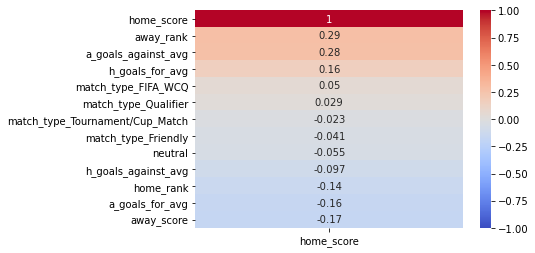

In [38]:
sns.heatmap(df.corr()[['home_score']].sort_values('home_score', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<AxesSubplot:>

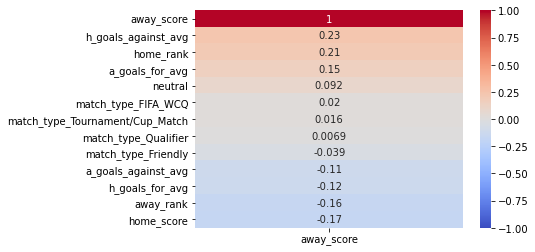

In [39]:
sns.heatmap(df.corr()[['away_score']].sort_values('away_score', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)